# 0- Import libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns #library  data visualization
import matplotlib.pyplot as plt #2D plotting library used in Python
from sklearn.model_selection import train_test_split # train_test_split and decision tree classifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

# 1- Preparing our dataset

In [2]:
zf = zipfile.ZipFile('fma-rock-vs-hiphop.csv.zip') 
tracks = pd.read_csv(zf.open('fma-rock-vs-hiphop.csv'))

zf1 = zipfile.ZipFile('echonest-metrics.json.zip') 
echonest_metrics = pd.read_json(zf1.open('echonest-metrics.json'))

In [3]:
tracks.head(), echonest_metrics.head()
# df.shape

(   track_id  bit_rate  comments        composer         date_created  \
 0       135    256000         1             NaN  2008-11-26 01:43:26   
 1       136    256000         1             NaN  2008-11-26 01:43:35   
 2       151    192000         0             NaN  2008-11-26 01:44:55   
 3       152    192000         0             NaN  2008-11-26 01:44:58   
 4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   
 
          date_recorded  duration  favorites genre_top    genres  ...  \
 0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
 1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
 2                  NaN       192          0      Rock      [25]  ...   
 3                  NaN       193          0      Rock      [25]  ...   
 4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   
 
   information interest  language_code  \
 0         NaN     2484             en   
 1         NaN     1948             

## Merge the relevant columns of tracks and echonest_metrics

In [4]:
echo_tracks =echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']],on='track_id')

echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


### unique genre_top

In [5]:
print(np.sort(echo_tracks['genre_top'].unique()))

['Hip-Hop' 'Rock']


# 2 - Pairwise Relationshipd between continuous variables

In [6]:
# Create a correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


more correlation between interest and listens because is up to 0.9

Here we can see an interesting correlation between danceability and valence, but it's not strong enough.

# 3- Splitting our data
- Create features by storing all values of the echo_tracks DataFrame except for the "genre_top" and "track_id" columns.
- Create labels as an array of the "genre_top" column from the DataFrame.
- Split our projected data into train and tests, features and labels, respectively using train_test_split() with random_state=10.

In [7]:
# Create features
a= echo_tracks.drop(['genre_top','track_id'],axis=1)
features = echo_tracks.drop(['genre_top','track_id'],axis=1).values

# Create labels
labels = echo_tracks['genre_top'].values

features, labels

(array([[4.16675233e-01, 6.75893985e-01, 6.34476268e-01, ...,
         1.59310065e-01, 1.65922000e+02, 5.76660988e-01],
        [3.74407769e-01, 5.28643062e-01, 8.17461132e-01, ...,
         4.61818128e-01, 1.26957000e+02, 2.69240242e-01],
        [4.35668989e-02, 7.45565870e-01, 7.01469992e-01, ...,
         1.24595342e-01, 1.00260000e+02, 6.21661224e-01],
        ...,
        [1.04777022e-02, 6.52483062e-01, 6.57497709e-01, ...,
         2.29174375e-01, 9.48850000e+01, 4.32240157e-01],
        [6.79063452e-02, 4.32421004e-01, 7.64508334e-01, ...,
         3.10552525e-01, 1.71329000e+02, 5.80087111e-01],
        [1.53518164e-01, 6.38659813e-01, 7.62567227e-01, ...,
         3.03372337e-01, 7.78420000e+01, 6.56612274e-01]]),
 array(['Hip-Hop', 'Hip-Hop', 'Hip-Hop', ..., 'Hip-Hop', 'Hip-Hop',
        'Hip-Hop'], dtype=object))

In [8]:
# Split our data

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size=0.33, random_state = 10)

# 4- Normalizing the feature data

In [9]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler #Standardization is a scaling technique, the entire data set scales with a zero mean and unit variance, altogether

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)

# Scale the test features to test_features
scaled_test_features =scaler.transform(test_features)

In [10]:
scaled_train_features.shape, scaled_test_features.shape

((3217, 8), (1585, 8))

# 5- Principal Component Analysis on our scaled data

use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.

Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

Text(0.5, 1.0, 'scree Plot')

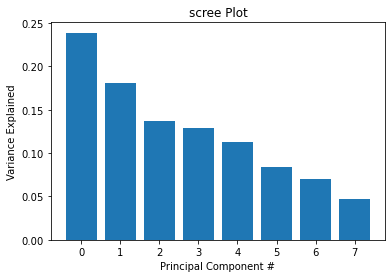

In [11]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)

#retrieve explained variance ratio
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.set_ylabel('Variance Explained')
plt.title('scree Plot')

# 6-Further visualization of PCA

Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method.

But all is not lost! Instead, we can also look at the cumulative explained variance plot to determine how many features are required to explain, say, about 85% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

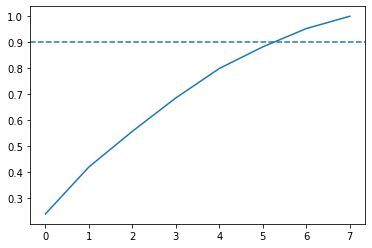

In [12]:
#calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance) 

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--') #for considering features needed to explain 85% of the variance

In [13]:
cum_exp_variance

array([0.23875593, 0.41947064, 0.55688905, 0.68552743, 0.79885948,
       0.88222572, 0.95247579, 1.        ])

# 7 - Projecting on to our features

We saw from the plot that 6 features (remember indexing starts at 0) can explain 85% of the variance!

Therefore, we can use 6 components to perform PCA and reduce the dimensionality of our train and test features.

In [14]:
n_components = 6

In [15]:

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)


# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)


In [16]:
train_pca.shape, test_pca.shape

((3217, 6), (1585, 6))

The shape confirms that we now have 6 features in total.

# 8- Train a decision tree to classify genre

Now we can use the lower dimensional PCA projection of the data to classify songs into genres.

Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.

Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated.

In [17]:
train_pca.shape, train_labels.shape, test_pca.shape, test_labels.shape

((3217, 6), (3217,), (1585, 6), (1585,))

In [18]:

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(train_pca, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

In [19]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, pred_labels_tree)

print("Decision Tree Classifier:", accuracy)


Decision Tree Classifier: 0.8498422712933754


# 9- Compare our decision tree to a logistic regression

Although our tree's performance is decent, it's a bad idea to immediately assume that it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.

Sometimes simplest is best, and so we will start by applying logistic regression. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified).

In [21]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
# test_features.shape, pred_labels_tree.shape

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.62      0.63      0.62       315
        Rock       0.91      0.90      0.91      1270

    accuracy                           0.85      1585
   macro avg       0.76      0.77      0.77      1585
weighted avg       0.85      0.85      0.85      1585

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.55      0.63       315
        Rock       0.89      0.96      0.92      1270

    accuracy                           0.87      1585
   macro avg       0.82      0.75      0.78      1585
weighted avg       0.87      0.87      0.87      1585



# 10. Balance our data for greater performance

Both our models do similarly well, boasting an average precision of 87% each. However, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs.

Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal.

To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in sample size of our data points when weighting our classes here, and not relative importance of each class.

In [22]:
# Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

# 11. Does balancing our dataset improve model bias?

We've now balanced our dataset, but in doing so, we've removed a lot of data points that might have been crucial to training our models. Let's test to see if balancing our data improves model bias towards the "Rock" classification while retaining overall classification performance.

Note that we have already reduced the size of our dataset and will go forward without applying any dimensionality reduction. In practice, we would consider dimensionality reduction more rigorously when dealing with vastly large datasets and when computation times become prohibitively large.

In [23]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca, train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree ))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



# 12. Using cross-validation to evaluate our models

Success! Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called cross-validation (CV). This step allows us to compare models in a more rigorous fashion.

Before we can perform cross-validation we will need to create pipelines to scale our data, perform PCA, and instantiate our model of choice - DecisionTreeClassifier or LogisticRegression.

Since the way our data is split into train and test sets can impact model performance, CV attempts to split the data multiple ways and test the model on each of the splits. Although there are many different CV methods, all with their own advantages and disadvantages, we will use what's known as K-fold CV here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])

# Set up our K-fold cross-validation
kf = KFold(n_splits=10)

tree=DecisionTreeClassifier(random_state=10)
logreg =LogisticRegression(random_state=10)


# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, features, labels, cv=kf)
logit_score = cross_val_score(logreg_pipe, features, labels, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7582417582417582 Logistic Regression: 0.782967032967033
